<a href="https://colab.research.google.com/github/AlexyNat/ml/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><u>Лабораторная работа №4. Основы нейронных сетей</u></h1>

<h3>Общее задание</h3>

<p>Перед выполнением лабораторной работы необходимо загрузить набор данных в соответствии с вариантом на диск
</p>
<ol>
  <li>Написать программу, которая разделяет исходную выборку на обучающую и тестовую (training set, validation set, test set), если такое разделение не предусмотрено предложенным набором данных.</li>
  <li>Произвести масштабирование признаков (scaling).</li>
  <li>Проверить точность модели по тестовой выборке</li>
  <li>С использованием библиотеки scikit-learn обучить 2 модели нейронной сети (Perceptron и MLPClassifier) по обучающей выборке. Перед обучением необходимо осуществить масштабирование признаков.</li>
  <li>Проверить точность модели по тестовой выборке.</li>
  <li>Провести эксперименты и определить наилучшие параметры коэффициента обучения, параметра регуляризации, функции оптимизации. Данные экспериментов необходимо представить в отчете (графики, ход проведения эксперимента, выводы).</li>
</ol>

<h2>Данные распознавания буквенных изображений</h2>
<h3>Letter Recognition Data Set - 13 вариант</h3>
<p>Набор искаженных черно-белых букв</p>

Attribute Information:
<ol>
	 <li>lettr	capital letter	(26 values from A to Z)</li>
	 <li>x-box	horizontal position of box	(integer)</li>
	 <li>y-box	vertical position of box	(integer)</li>
	 <li>width width of box			(integer)</li>
	 <li>high 	height of box			(integer)</li>
	 <li>onpix	total # on pixels		(integer)</li>
	 <li>x-bar	mean x of on pixels in box	(integer)</li>
	 <li>y-bar	mean y of on pixels in box	(integer)</li>
	 <li>x2bar	mean x variance			(integer)</li>
	 <li>y2bar	mean y variance			(integer)</li>
	 <li>	xybar	mean x y correlation		(integer)</li>
	 <li>x2ybr	mean of x * x * y		(integer)</li>
	 <li>	xy2br	mean of x * y * y		(integer)</li>
	 <li>	x-ege	mean edge count left to right	(integer)</li>
	 <li>xegvy	correlation of x-ege with y	(integer)</li>
	 <li>y-ege	mean edge count bottom to top	(integer)</li>
	 <li>yegvx	correlation of y-ege with x	(integer)</li>
</ol>

<h3>Разделяем данные</h3>

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.utils import shuffle
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv('sample_data/letters.data', header=None)
# классы (буквы)
y = data[0]
# удаляем классы (наименования буквы) из признаков
data.drop([0], axis=1, inplace=True)
# разделение данных 0.7 к 0.3
X_train, X_holdout, y_train, y_holdout = train_test_split(data.values, y, test_size=0.3)

<h3>Масштабирование признаков</h3>

In [ ]:
from sklearn.preprocessing import StandardScaler

# масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.transform(X_holdout)

<h3>Обучение модели MLPClassifier (Многослойный персептрон) нейронной сети</h3>

In [ ]:
from sklearn.neural_network import MLPClassifier

plt.figure(figsize=(14, 5))
funcs = 'identity', 'logistic', 'tanh', 'relu' # функции активации
learning_rate_init = np.linspace(0.0001, 5, 3) # коэффициента обучения
score = [[],[],[],[]]

for inx, func in enumerate(funcs):
  for rate in learning_rate_init:
    clf_mlp = MLPClassifier(random_state=7,activation=func,learning_rate_init=rate).fit(X_train_scaled, y_train)
    score[inx].append(clf_mlp.score(X_holdout_scaled, y_holdout))

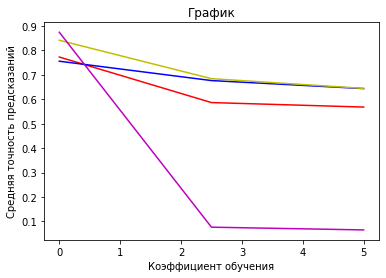

In [ ]:
plt.title('График')
plt.xlabel("Коэффициент обучения")
plt.ylabel("Средняя точность предсказаний")
plt.plot(learning_rate_init, score[0], "r-")
plt.plot(learning_rate_init, score[1], "b-")
plt.plot(learning_rate_init, score[2], "y-")
plt.plot(learning_rate_init, score[3], "m-")
plt.show()

<h3>Проверка точности модели MLPClassifier по тестовой выборке</h3>

In [ ]:
beg = 3
end = 15
clf_mlp = MLPClassifier(random_state=7,activation='relu').fit(X_train_scaled, y_train)
pred_vals = clf_mlp.predict(X_holdout_scaled[beg:end, :])
print(f'Предсказанные классы: ({end - beg} вариантов)', pred_vals)
print(f'Истинные классы:      ({end - beg} вариантов)', y_holdout.values[beg:end])
print(f'Средняя точность предсказаний: {clf_mlp.score(X_holdout_scaled, y_holdout):.2}')

Предсказанные классы: (12 вариантов) ['J' 'W' 'Z' 'P' 'Q' 'S' 'L' 'W' 'C' 'I' 'H' 'G']
Истинные классы:      (12 вариантов) ['J' 'W' 'Z' 'P' 'Q' 'D' 'L' 'W' 'C' 'I' 'V' 'H']
Средняя точность предсказаний: 0.95


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<h3>Обучение модели Perceptron нейронной сети</h3>

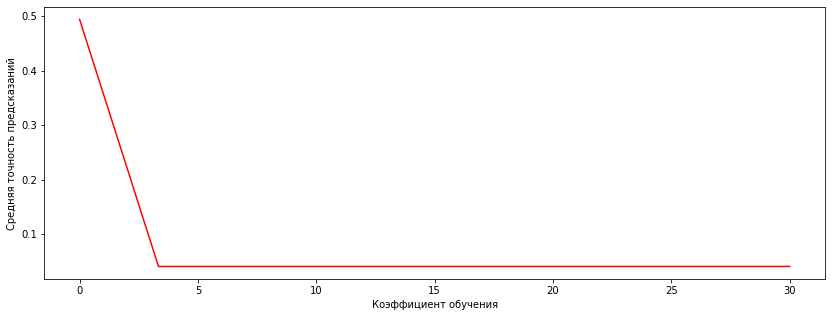

In [ ]:
from sklearn.linear_model import Perceptron

plt.figure(figsize=(14, 5))
alpha = np.linspace(0.0001, 30, 10)
score = []

for a in alpha:
  clf_perc = Perceptron(max_iter=1000, alpha=a,penalty='l2', random_state=6, n_iter_no_change=30).fit(X_train_scaled, y_train)
  score.append(clf_perc.score(X_holdout_scaled, y_holdout))

plt.xlabel("Коэффициент обучения")
plt.ylabel("Средняя точность предсказаний")
plt.plot(alpha, score, "r-", label='elasticnet')
plt.show()

<h3>Проверка точности модели Perceptron по тестовой выборке</h3>

In [ ]:
beg = 3
end = 15

clf_perc = Perceptron(max_iter=1000, random_state=7, n_iter_no_change=50).fit(X_train_scaled, y_train)
pred_vals = clf_perc.predict(X_holdout_scaled[beg:end, :])

print(f'Предсказанные классы: ({end - beg} вариантов)', pred_vals)
print(f'Истинные классы:      ({end - beg} вариантов)', y_holdout.values[beg:end])
print(f'Средняя точность предсказаний: {clf_perc.score(X_holdout_scaled, y_holdout):.2}')

Предсказанные классы: (12 вариантов) ['J' 'W' 'Z' 'P' 'Q' 'P' 'L' 'W' 'U' 'I' 'F' 'H']
Истинные классы:      (12 вариантов) ['J' 'W' 'Z' 'P' 'Q' 'D' 'L' 'W' 'C' 'I' 'V' 'H']
Средняя точность предсказаний: 0.53
